# Plots coprecessing angles with dynamics

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup the notebook's environment
import lalsimulation as lalsim
import lal
import numpy as np
from numpy import *
from matplotlib.pyplot import *
from positive import *
from nrutils import lalphenom
from positive.units import *
from nrutils import scsearch,gwylm
from xcp import *
from nrutils.manipulate.rotate import gwylm_radiation_axis_workflow

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


In [2]:
# Let the user know where lalsimulation lives
alert('We are getting our LALSimulation from:\n%s'%green(lalsim.__path__[0]))

(notebook)>> We are getting our LALSimulation from:
/Users/book/opt/anaconda2/envs/hack-phenomx3/lib/python3.6/site-packages/lalsimulation


In [3]:
print( isinstance(['q1a02t90_T_96_384','pnr-catalog'],tuple) )

False


In [4]:
# Find a catalog entry of interest using a keyword search
# a = scsearch(keyword='q1a02t120',verbose=True)[0]
# a = scsearch(keyword='q1a02t60_T_96_384',verbose=True)[0]
# a = scsearch(keyword='q4a04t90',verbose=True)[0] # q8a08t60Ditm45dr075_96_360
a = scsearch(keyword=['q1a02t90_T_96_384','pnr-catalog'],verbose=True,catalog=xcp.calibration_catalog)[0]

(scsearch)>> Found catalog (=...) keyword.
(scsearch)>> Found keyword (=...) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 1 possibly degenerate simulations:
(scsearch)>> [0001][pnr-catalog] q1: 2chi0.20-p-q1.00	(q1a02t90_T_96_384)



In [7]:


# Define loading parameters
lmax = 4 # NOTE --- if we want moments up to ell, then lmax=ell+1 is needed for minimal accuracy
pad = 1000
clean = True
dt = 0.5

# Load
frame = {}
frame['bam'] = gwylm(a,lmax=lmax,dt=dt,pad=pad,clean=clean,verbose=False)

(romline!)>> N is 2, but it must be less than or equal to 3. We have set N=3. This course is often desired in cases where N=2 is naively given.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.


In [8]:

# Put waveform in variouis frames 
frame['ji'] = frame['bam'].__calc_initial_j_frame__()
frame['ji'].__enforce_m_relative_phase_orientation__()
frame['li'] = frame['ji'].__calc_initial_l_frame__()
frame['jt'] = frame['ji' ].__calc_j_of_t_frame__()

(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


In [9]:

# Select multipole moments to use when calculating coprecessing frame
cpframe_select_lm = [ (2,1), (2,2), (2,-1), (2,-2), (2,0) ]

# Calc copreessing frame
frame['cp'] = frame['ji' ].__calc_coprecessing_frame__( transform_domain='td', kind='psi4',select_lm_list=cpframe_select_lm )


(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(calc_coprecessing_angles!)>> flipping manually for negative domain
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


In [25]:
y33_scrubbed = frame['cp'][3,3]['psi4'].scrub(apply=False)

([<AxesSubplot:ylabel='$rM\\psi_{33}$'>,
  <AxesSubplot:ylabel='$\\phi = \\mathrm{arg}(rM\\psi_{33})$'>,
  <AxesSubplot:ylabel='$\\mathrm{d}{\\phi}/\\mathrm{d}t$'>,
  <AxesSubplot:xlabel='$t$', ylabel='$\\mathrm{d}^2{\\phi}/\\mathrm{d}t^2$'>],
 <Figure size 633.6x760.32 with 4 Axes>)

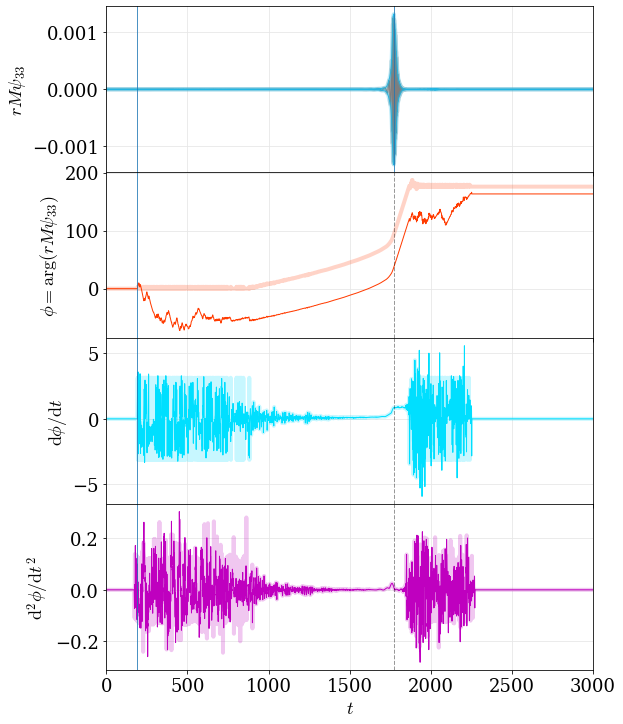

In [28]:
frame['cp'][3,3]['psi4'].plot( ref_gwf=y33_scrubbed, domain='time' )

([<AxesSubplot:ylabel='$rM\\psi_{44}$'>,
  <AxesSubplot:ylabel='$\\phi = \\mathrm{arg}(rM\\psi_{44})$'>,
  <AxesSubplot:ylabel='$\\mathrm{d}{\\phi}/\\mathrm{d}t$'>,
  <AxesSubplot:xlabel='$t$', ylabel='$\\mathrm{d}^2{\\phi}/\\mathrm{d}t^2$'>],
 <Figure size 633.6x760.32 with 4 Axes>)

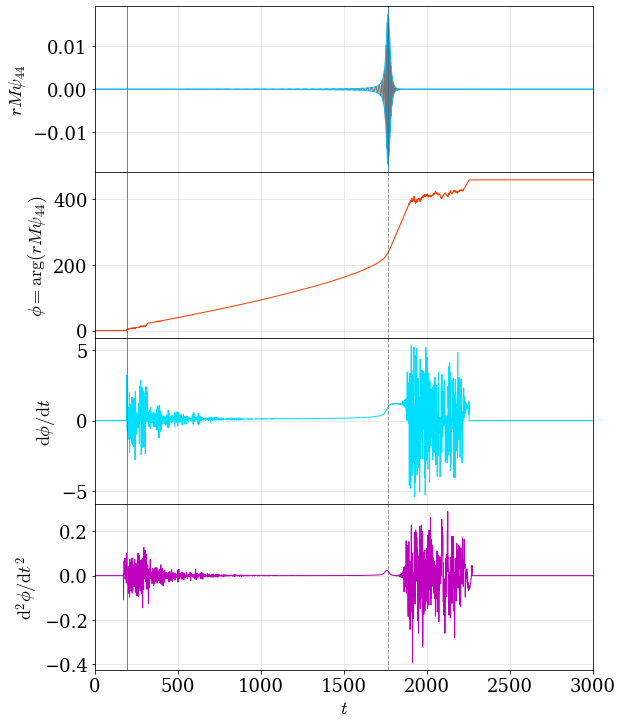

In [11]:
frame['cp'].__symmetrize__()[4,4]['psi4'].plot()

In [12]:

# Calculate coprecessing angles 
foo = gwylm_radiation_axis_workflow( frame['ji'], kind='psi4', select_lm_list = cpframe_select_lm )


(gwylm_radiation_axis_workflow)>> Calculating Radiated Quantities
(gwylm_radiation_axis_workflow)>> Calculating TD Radiation Axis Series
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(calc_coprecessing_angles!)>> flipping manually for negative domain
(gwylm_radiation_axis_workflow)>> Calculating FD Radiation Axis Series
(calc_coprecessing_angles)>> The domain values seem evenly split between positive and negative values. Thus, we will interpret the input as corresponding to FREQUENCY DOMAIN data.


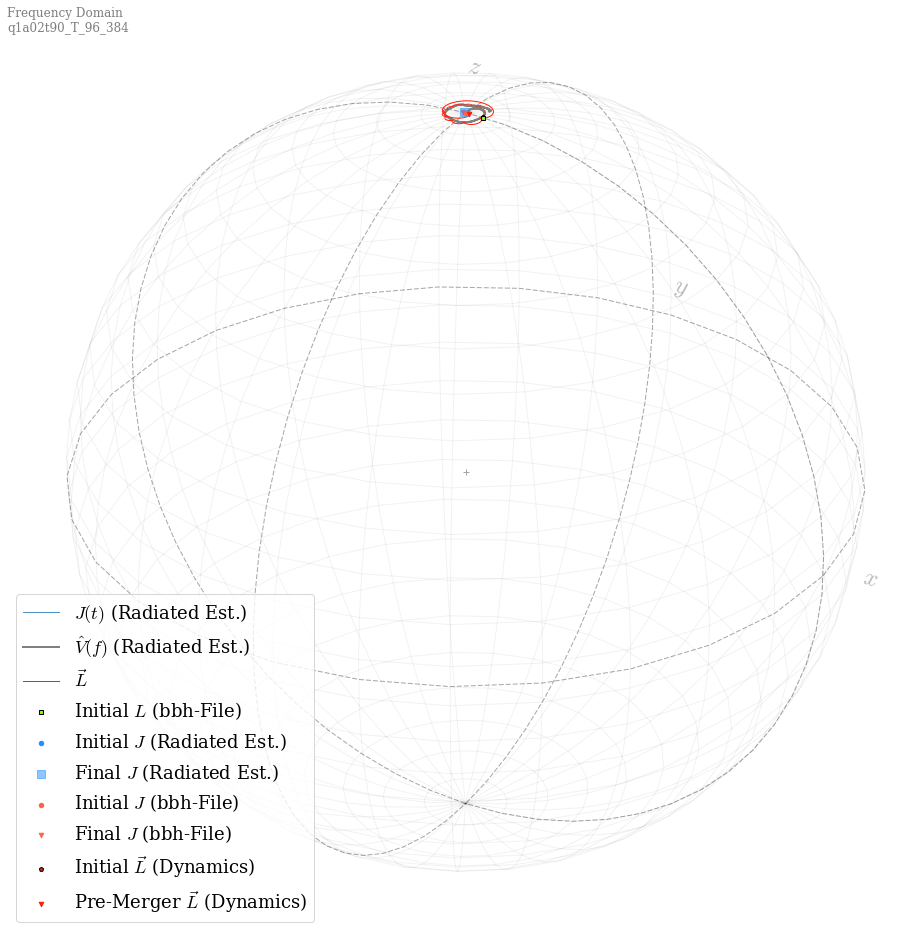

In [20]:

# foo.save = True
foo.save = False
foo.outdir='/Users/book/Desktop/'
fig,ax = foo.plot_radiation_axis_on_sphere(domain='freq')


(<Figure size 1152x1152 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1c438af9b0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1c43b50940>))

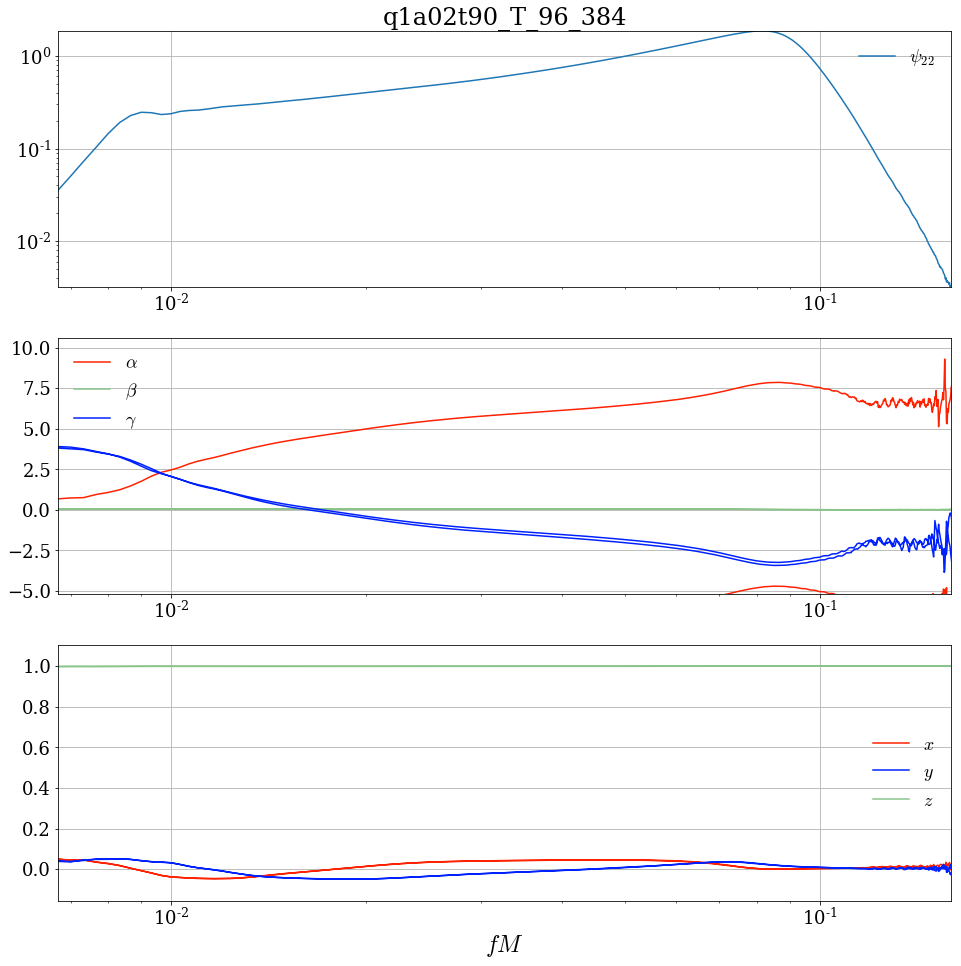

In [15]:
foo.plot_radiation_axis_3panel(domain='freq')